In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats       as stats
import scipy.optimize     as optimize 

import htintro_examples  as htexam

plt.style.context('seaborn-colorblind');

### Basic concepts 1
In a low prevalence population, the probability of an individual to have HIV+ is 1 in 1000. Consider a medical test of HIV. 

If the patient is HIV+, the test is positive in 99.8 % of the times (true-positive), but if the person is HIV-, the test can wrongly be positive 0.2 % of the times (false positive). 

After a test, a patient is diagnosed with HIV+, what is the probability that he has HIV +? Should the doctor repeat the test?

$$
p(H+ | +) = \frac{p(+ | H+) p(H+)}{p(+)} =  \frac{p(+ | H+) p(H+)}{p(+ | H+) p (H+) + p(+ | H-) p (H-)}
$$

with

$$
p(H+) = 10^{-3}, \; p(H-) = 1-10^{-3}, \; p(+ | H+) = 0.998, \; p(+ | H-) = 0.002 
$$

In [4]:
"""
pa = probability of being positive
pxa = probability of testing positive if the patient is positive
pxnoa = probability of testing positive if the patient negative
"""
def bayes_pax(pa, pxa, pxnoa):
    return (pxa * pa) / (pxa * pa + pxnoa * (1-pa))

pax = bayes_pax(1e-3, 0.998, 0.002)
print(pax)

0.3331108144192256


### Basic concepts 2:
Compare a gaussian distribution, with $\mu=p \, N, \, \sigma = \sqrt{\mu}$ with a binomial when $N$ is large and $p$ is small and $\mu = N p > 50$. You can use $stats.binom$ and $stats.norm$.

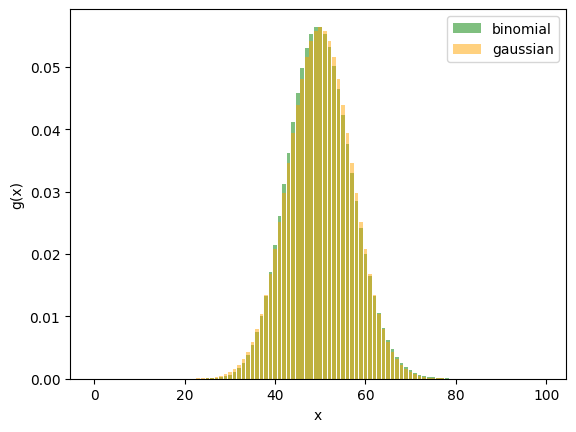

In [5]:
N, p = 1e4, 50./1e4; ns = np.arange(100)
plt.bar(ns, stats.binom.pmf(ns, N, p)            , color='green' , alpha=0.5, label='binomial')
plt.bar(ns, stats.norm.pdf(ns, N*p, np.sqrt(N*p)), color='orange', alpha=0.5, label='gaussian')
plt.xlabel('x'); plt.ylabel('g(x)'); plt.legend();